# Create a city map with points of interest

## Project Context 

Description of the project:

The goal of this project is to download geospatial data of the city of Youssoufia from an open-source platform such as OpenStreetMap or GeoJSON, process and analyze the data using Python's Geopandas and Matplotlib libraries, and finally create a static visualization of points of interest (POIs) on a map of the city.

## Install The Necessary Modules 

In [7]:
!pip3 install Folium --quiet

In [61]:
import folium
import requests
import csv
import pandas as pd 
import seaborn as sns
import folium
import csv
from geopy.distance import geodesic

In [29]:
city_latitude = 33.224161672993574
city_longitude = -8.501600915191846

m = folium.Map(location=[city_latitude, city_longitude], zoom_start=13)
m.scrollWheelZoom = False
m.touchZoom = False
m.doubleClickZoom = False
m.boxZoom = False
m.dragging = False

overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = f"""
    [out:json];
    node(around:5000, {city_latitude}, {city_longitude});
    out;
"""

response = requests.get(overpass_url, params={"data": overpass_query})
if response.status_code == 200:
    data = response.json()
    markers_data = []
    for element in data["elements"]:
        if "tags" in element:
            if "name" in element["tags"]:
                name = element["tags"]["name"]
            else:
                name = "Unknown"
            amenity = element["tags"].get("amenity", "Unknown")
            latitude = element["lat"]
            longitude = element["lon"]
            markers_data.append((name, amenity, latitude, longitude))


csv_filename = "city_markers.csv"
with open(csv_filename, "w", newline="") as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(["Name", "Amenity", "Latitude", "Longitude"])
    for marker_data in markers_data:
        csv_writer.writerow(marker_data)

m


## Treate The Given Csv File 

In [42]:
na_values = ['Unknown']

df = pd.read_csv('city_markers.csv' , na_values =na_values )

<Axes: >

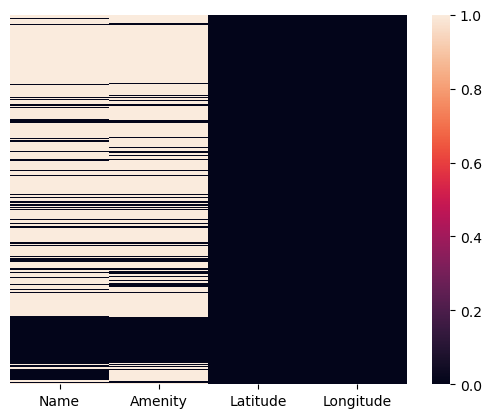

In [43]:
sns.heatmap(df.isnull() , yticklabels = False)

In [44]:
df.dropna(subset=['Amenity'], axis=0, inplace=True)

In [50]:
df['Amenity'].unique()

array(['fuel', 'theatre', 'cafe', 'parking', 'school', 'restaurant',
       'post_office', 'bureau_de_change', 'bank', 'place_of_worship',
       'driving_school', 'pharmacy', 'fast_food', 'bank;pharmacy',
       'dentist', 'atm', 'college', 'car_rental', 'bus_station',
       'language_school', 'nursing_home'], dtype=object)

In [63]:
import folium
import csv

def display_map_with_amenity(amenity_name):
    csv_filename = "city_markers.csv"
    markers_data = []

    with open(csv_filename, "r", newline="") as csvfile:
        csv_reader = csv.reader(csvfile)
        next(csv_reader)  # Skip the header row
        for row in csv_reader:
            name, amenity, latitude, longitude = row
            if amenity == amenity_name:
                markers_data.append((name, amenity, float(latitude), float(longitude)))

    if not markers_data:
        print(f"No markers found for Amenity: {amenity_name}")
        return None

    city_latitude = 33.224161672993574
    city_longitude = -8.501600915191846
    m = folium.Map(location=[city_latitude, city_longitude], zoom_start=13)

    m.scrollWheelZoom = False
    m.touchZoom = False
    m.doubleClickZoom = False
    m.boxZoom = False
    m.dragging = False

    folium.Marker(location=[city_latitude, city_longitude], popup="City Center").add_to(m)

    # Add markers for the desired Amenity
    for marker_data in markers_data:
        name, amenity, latitude, longitude = marker_data
        popup_content = f"{name} ({amenity})<br>Latitude: {latitude}<br>Longitude: {longitude}"
        folium.Marker(
            location=[latitude, longitude],
            popup=popup_content
        ).add_to(m)

    return m

desired_amenity = input("Enter the desired Amenity name: ")

map_with_amenity = display_map_with_amenity(desired_amenity)

map_with_amenity


Enter the desired Amenity name:  cafe


In [67]:
import folium
import requests
from geopy.distance import geodesic

def calculate_distance(point1, point2):
    return geodesic(point1, point2).kilometers

def get_osrm_route(point1, point2):
    url = "http://router.project-osrm.org/route/v1/driving/"
    coords = f"{point1[1]},{point1[0]};{point2[1]},{point2[0]}"
    params = {
        "steps": "true",
        "geometries": "geojson",
    }
    response = requests.get(url + coords, params=params)
    if response.status_code == 200:
        data = response.json()
        if "routes" in data and len(data["routes"]) > 0:
            route_geometry = data["routes"][0]["geometry"]
            return route_geometry
    return None

latitude1 = float(input("Enter the latitude of the first marker: "))
longitude1 = float(input("Enter the longitude of the first marker: "))
point1_coords = (latitude1, longitude1)

latitude2 = float(input("Enter the latitude of the second marker: "))
longitude2 = float(input("Enter the longitude of the second marker: "))
point2_coords = (latitude2, longitude2)

distance = calculate_distance(point1_coords, point2_coords)
print(f"Distance between the two markers: {distance:.2f} kilometers")

m = folium.Map(location=[latitude1, longitude1], zoom_start=13)

folium.Marker(location=[latitude1, longitude1], popup="Marker 1").add_to(m)
folium.Marker(location=[latitude2, longitude2], popup="Marker 2").add_to(m)

route_geometry = get_osrm_route(point1_coords, point2_coords)

if route_geometry:
    folium.PolyLine(locations=[list(reversed(coord)) for coord in route_geometry["coordinates"]], color='blue').add_to(m)

m


Enter the latitude of the first marker:  33.2296382
Enter the longitude of the first marker:  -8.4932363
Enter the latitude of the second marker:  33.2290005
Enter the longitude of the second marker:  -8.5007341


Distance between the two markers: 0.70 kilometers
